We started off with importing relevant libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Next, we grabbed relevant data. The questions we considered analyzing are all related to 1A experiences and advice. These include: 

*   Given the chance, would you apply to SYDE again?
*   How does your current experience with SYDE compare to what you **expected** it to be when you applied?
*   What is the biggest piece of advice/wisdom you would give to someone thinking about applying to SYDE?
*   If you could describe 1A in one word, what would it be?





In [3]:
data = pd.read_csv("unordered.csv")

# In our dataset, the columns are named by survey question title

rel_cols = ['Given the chance, would you apply to SYDE again?',
           'How does your current experience with SYDE compare to what you expected it to be when you applied?',
           'What is the biggest piece of advice/wisdom you would give to someone thinking about applying to SYDE?',
           'If you could describe 1A in one word, what would it be?']

df = data[rel_cols].dropna().rename(columns={'Given the chance, would you apply to SYDE again?' : 'apply_again',
           'How does your current experience with SYDE compare to what you expected it to be when you applied?' : 'expected_experience',
           'What is the biggest piece of advice/wisdom you would give to someone thinking about applying to SYDE?': 'advice',
           'If you could describe 1A in one word, what would it be?':'describe1a'})

df

,apply_again,expected_experience,advice,describe1a
0,Yes,4.0,It won't be easy,Hell
4,Yes,3.0,"Try out many different things in high school, ...",dramatic
5,Yes,5.0,Be sociable,Hectic
6,Yes,4.0,"It’s just a program, it won’t make that much o...",Chaotic
7,Yes,3.0,"Any university degree is a marathon, not a spr...",An Ordeal.
...,...,...,...,...
80,Yes,6.0,If you want the nicest and best co-op communit...,based
83,Yes,3.0,"Grades don't matter as much, so don't stress t...",New
84,Yes,4.0,It is absolutely what you make of it!,Life-changing
90,Yes,3.0,Try hard but you still have to have fun,Fun


To get a better idea of the data we are working with, we generated a rough bar graph.

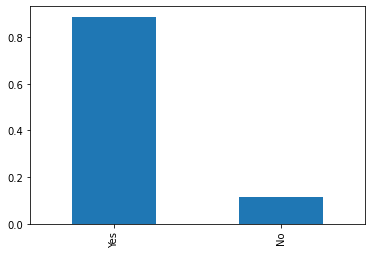

In [4]:
apply_df = df['apply_again']
apply_df

df['apply_again'].value_counts(normalize= True).plot.bar()

We are focusing on the questions where students described their 1A experience and where they gave advice to future students. Both questions have 62 responses to work with.

In [5]:
data = df[['describe1a', 'advice']]
describe_df = df.groupby('describe1a')['describe1a'].count()
df['describe1a'].count()
data.count()

describe1a    62
advice        62
dtype: int64

Taking a closer look at the types of words we are working with, it is clear that some will be recognizable - like 'TsTsians'. For reference, these are fictional aliens created by our Design professor for our term design projects. 

In [6]:
describe_df

describe1a
0/10                                     1
Adjustment                               1
Adventurous                              1
Alcohol                                  1
Amazing                                  1
An Ordeal.                               1
Balanced                                 1
Busy                                     1
Change                                   1
Chaotic                                  1
Collaborative                            1
Exciting                                 1
Exhaustion                               1
Eye-opening                              1
F U N K Y                                1
Fast                                     1
Freedom                                  1
Fun                                      2
Fun socially, depressing academically    1
Fun with some difficult times            1
Hectic                                   1
Hell                                     1
Intense                                  2


It follows that the next step of the analysis includes cleaning up the data. 

In [7]:
# Create a list for the describe 1A data
described= df['describe1a'].values.tolist()

# Removing capital letters 
for word in range(len(described)):
    described[word] = described[word].lower()

clean_described = []
for w in range(0, len(described)):

    # Removing spaces
    clean_described.append(re.sub(" ", "", described[w]))

    # Removing periods
    clean_described[w] = re.sub("-","", clean_described[w])

clean_described

['hell',
 'dramatic',
 'hectic',
 'chaotic',
 'anordeal.',
 'ok.',
 'marathon',
 'new',
 'chaoticandlonely',
 'adventurous',
 'family',
 'funsocially,depressingacademically',
 'ok',
 'joyful',
 'amazing',
 'rush',
 'shit',
 'poggywoggy',
 'rollercoaster',
 'fast',
 '0/10',
 'pedantic',
 'tstsians',
 'change',
 'scrambled',
 'fast',
 'decent',
 'intense',
 'exhaustion',
 'shit',
 'busy',
 'hectic',
 'tstsians',
 'eyeopening',
 'tstsians',
 'mid',
 'unexpected',
 'adjustment',
 'exciting',
 'death',
 'learningcurve',
 'freedom',
 'tsts',
 'movie',
 'lit',
 'intense',
 'fun',
 'new',
 'balanced',
 'alcohol',
 'people',
 'new',
 'funwithsomedifficulttimes',
 'funky',
 'online',
 'pain',
 'tstsian',
 'based',
 'new',
 'lifechanging',
 'fun',
 'collaborative']

We than lemmatized the data, a process that removes 'uneccessary' characters from a word - bringing it back to its root form. For instance, 'run', 'runs', and 'running' would be reduced to 'run'. 

Following this step, the tokezined words were stripped of spaces and combined as strings for the next step of analysis.

In [8]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

# lemmatization 

def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word in clean_described:
        lemmatized_sentence.append(lemmatizer.lemmatize(word))
    return lemmatized_sentence
    
lemmatize_words(clean_described)

# converting the Tokenized list to string to apply sentiment.polarity() via TextBlob

text=''
for i in clean_described:
    text += i
print(text)

helldramatichecticchaoticanordeal.ok.marathonnewchaoticandlonelyadventurousfamilyfunsocially,depressingacademicallyokjoyfulamazingrushshitpoggywoggyrollercoasterfast0/10pedantictstsianschangescrambledfastdecentintenseexhaustionshitbusyhectictstsianseyeopeningtstsiansmidunexpectedadjustmentexcitingdeathlearningcurvefreedomtstsmovielitintensefunnewbalancedalcoholpeoplenewfunwithsomedifficulttimesfunkyonlinepaintstsianbasednewlifechangingfuncollaborative


At this point, we are bringing in the Afinn and Vader scales as a method to measure sentiment. Use '!pip install afinn' and '!pip install vaderSentiment' to install the libraries. 

As a side note, Afinn is more focused on individual words than a full sentence. 

In [10]:
!pip install afinn

     |████████████████████████████████| 52 kB 858 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=0af7c5ea672d3dbb1ae49d20c09e019180f614711734f0353839ab134737812b
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [11]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.4 MB/s 


Calculating the afinn score for the describe 1A question:

In [12]:
import afinn
from afinn import Afinn
afinn = Afinn()

df['afinn_score'] = df['describe1a'].apply(afinn.score)
df['afinn_score'].describe()

count    62.000000
mean      0.129032
std       1.644503
min      -4.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.000000
Name: afinn_score, dtype: float64

Visualizing the data and creating a histogram:

Text(0.5, 1.0, 'Frequency vs Afinn Score - Describe 1A')

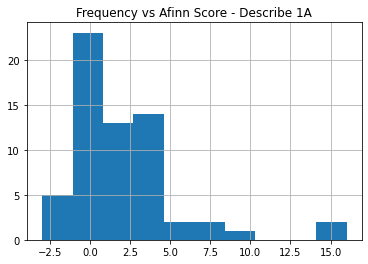

In [31]:
columns_to_display = ['describe1a','afinn_score']
values = df.sort_values(by='afinn_score')[columns_to_display]
values

values.hist()
plt.title('Frequency vs Afinn Score - Describe 1A')

Next, calculating the afinn score of the advice question and putting it into graph form:

In [17]:
df['afinn_score'] = df['advice'].apply(afinn.score)
df['afinn_score'].describe()

count    62.000000
mean      1.919355
std       3.535758
min      -3.000000
25%       0.000000
50%       1.000000
75%       3.000000
max      16.000000
Name: afinn_score, dtype: float64

Text(0.5, 1.0, 'Frequency vs Afinn Score - Advice')

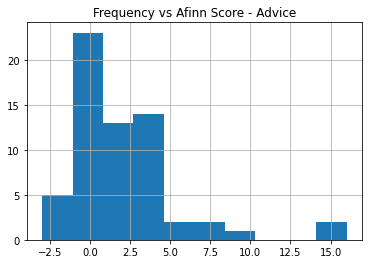

In [32]:
columns_to_display = ['advice', 'afinn_score']
values2 = df.sort_values(by='afinn_score')[columns_to_display]
values2

values2.hist()
plt.title('Frequency vs Afinn Score - Advice')

Unlike Afinn, which returns a single value, Vader analysis returns a dictionary.

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# summary of polarity scores

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(df['advice'])

sentiment = df['advice'].apply(analyzer.polarity_scores)
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df.head()

,neg,neu,pos,compound
0,0.445,0.555,0.000,-0.3412
1,0.000,1.000,0.000,0.0000
2,0.000,0.256,0.744,0.4404
3,0.000,0.818,0.182,0.5824
4,0.000,0.769,0.231,0.5859


Using vader sentiment to analyze the describe 1A data:

In [21]:
added_df_sentiment = pd.concat([df,sentiment_df], axis =1)
added_df_sentiment.head()

,apply_again,expected_experience,advice,describe1a,afinn_score,neg,neu,pos,compound
0,Yes,4.0,It won't be easy,Hell,4.0,0.445,0.555,0.000,-0.3412
1,NaN,NaN,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
2,NaN,NaN,NaN,NaN,NaN,0.000,0.256,0.744,0.4404
3,NaN,NaN,NaN,NaN,NaN,0.000,0.818,0.182,0.5824
4,Yes,3.0,"Try out many different things in high school, ...",dramatic,0.0,0.000,0.769,0.231,0.5859


In [22]:
# For ease of testing, the whole process was put into one function so we can try it multiple times

def vaderize(df, column):

    analyzer = SentimentIntensityAnalyzer()    
    sentiment = df[column].apply(analyzer.polarity_scores)
    
    sdf = pd.DataFrame(sentiment.tolist()).add_prefix('vader_')
    
    # Merge dataframes
    df_combined = pd.concat([df,sdf], axis=1)
    return df_combined
  
df_vaderized = vaderize(df, 'describe1a')
df_vaderized.head(50)

,apply_again,expected_experience,advice,describe1a,afinn_score,vader_neg,vader_neu,vader_pos,vader_compound
0,Yes,4.0,It won't be easy,Hell,4.0,1.000,0.000,0.000,-0.6808
1,NaN,NaN,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
2,NaN,NaN,NaN,NaN,NaN,0.000,1.000,0.000,0.0000
3,NaN,NaN,NaN,NaN,NaN,1.000,0.000,0.000,-0.4939
4,Yes,3.0,"Try out many different things in high school, ...",dramatic,0.0,0.000,1.000,0.000,0.0000
5,Yes,5.0,Be sociable,Hectic,0.0,0.000,1.000,0.000,0.0000
6,Yes,4.0,"It’s just a program, it won’t make that much o...",Chaotic,0.0,0.000,1.000,0.000,0.0000
7,Yes,3.0,"Any university degree is a marathon, not a spr...",An Ordeal.,2.0,0.000,1.000,0.000,0.0000
8,NaN,NaN,NaN,NaN,NaN,0.851,0.149,0.000,-0.6908
9,Yes,4.0,Code,Ok.,0.0,0.000,0.000,1.000,0.3400


Text(0.5, 0, 'Vader score')

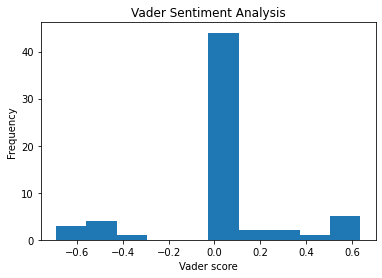

In [28]:
# Plotting vader analysis 

df_vaderized['vader_compound'].plot(kind='hist')
plt.title('Vader Sentiment Analysis - Describe 1A')
plt.ylabel('Frequency')
plt.xlabel('Vader Score')

Text(0.5, 1.0, 'Vader Sentiment Analysis')

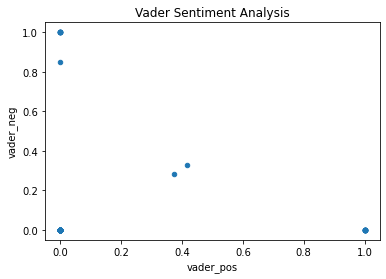

In [30]:
df_vaderized.plot.scatter(x='vader_pos', y='vader_neg')
plt.title('Vader Sentiment Analysis - Describe 1A')